In [ ]:
import lofo

In [10]:
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import numpy as np
import random
import gc

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectKBest, chi2, SelectFpr
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA,  KernelPCA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neural_network
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
import optuna
import skopt
import mlxtend

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
gc.collect()

31

In [12]:
y_val = pd.read_csv('vlad_work.csv')

In [14]:
df_train = pd.read_csv('train.csv')
df_val = pd.read_csv('test.csv')
# y_val = pd.read_csv('vlad_work.csv')['target']

In [1121]:
y = []
for elt in y_val:
    if elt>0.5:
        y.append(1)
    else:
        y.append(0)

df_val['target'] = y

In [15]:
def transform(df_train, df_test, mappers):
    train = df_train[cols].values
    test = df_test[cols].values
    data = np.concatenate((train,test), axis = 0)
    
    for elt in mappers:
        
        mapper = elt.fit(data)
        train = mapper.transform(train)
        test = mapper.transform(test)
        data = np.concatenate((train,test), axis = 0)
    return train, test
    

In [1170]:
for ind in range(50):
#     ind = 10
    df_t = df_train[df_train['wheezy-copper-turtle-magic']==ind]
    df_v = df_val[df_val['wheezy-copper-turtle-magic']==ind]
    y_t= df_t['target'].values
    y_v= df_v['target'].values
    mappers = [VarianceThreshold(threshold=1.5)]



    train, val = transform(df_t, df_v, mappers)


    clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
    clf.fit(train, y_t)
    y_proba = clf.predict_proba(train)[:,1]

    tres = 0.9
    y_t[abs(y_t-y_proba)>tres] = 1-y_t[abs(y_t-y_proba)>tres]

#     clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
    clf = NuSVC(probability=True, kernel='poly', degree=2, gamma='auto', nu=0.6, coef0=0.08)
    clf.fit(val, y_v)

    y_proba = clf.predict_proba(train)[:,1]
    print(str(ind) +'  '+str(roc_auc_score(y_t, y_proba)))


    # X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5, random_state = 42)

0  0.9431677890011223
1  0.9419291338582676
2  0.9474968976552806
3  0.9384176803531642
4  0.8887620192307693
5  0.9352056612118531
6  0.798327664399093
7  0.9166992141730068
8  0.9044877819548873
9  0.930195177956372
10  0.8770342413832035
11  0.974763923352633
12  0.8449831715526073
13  0.9572936170212766
14  0.9544488644090847
15  0.7695300763175289
16  0.9417068567833927
17  0.7898166319146327
18  0.9536805058458602
19  0.9266555812608444
20  0.9552669773126575
21  0.9432878222523746
22  0.9468348101441626
23  0.9262195211461958
24  0.9476296563247387
25  0.9652673663168415
26  0.8707554751858549
27  0.9354457132042144
28  0.9593749132980052
29  0.9528709677419356
30  0.9456777818050018
31  0.9527317088236203
32  0.9332098384274983
33  0.965101094895748
34  0.903556042351223
35  0.8782310806602304
36  0.9533834586466166
37  0.9278078007518797
38  0.9539536498567833
39  0.9353229571984436
40  0.841871551245633
41  0.9444635677700061
42  0.8882948028997006
43  0.9445973134505
44  0.9

In [1138]:
df_t.shape

(534, 258)

In [18]:
cols1 = [c for c in df.columns if c not in ['id', 'target']]
cols = [c for c in df.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]

In [321]:
df = df_train[df_train['wheezy-copper-turtle-magic']==0]
# df = df[df['target']==1]
# df.to_csv('zero.csv')
# df = pd.read_csv('zero.csv')
y = df['target'].values
y1 = deepcopy(y)

# clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
# n_features = VarianceThreshold(threshold=1.5).fit_transform(df[cols].values).shape[1]

# X = PCA(n_components=n_features).fit_transform(df[cols].values)
# # X = VarianceThreshold(threshold=1.5).fit_transform(df[cols].values)
# # X = FastICA(n_components=n_features, random_state=0, max_iter = 1000).fit_transform(df[cols].values)


# clf.fit(X, y)
# pred = clf.predict(X)
# y1[abs(y-pred)>0.9] =1-y1[abs(y-pred)>0.9]



X_train, X_test, y_train, y_test = train_test_split(df, y1, test_size=0.2, random_state = 42)

# y_test = X_test['target']
mappers = [
    ## Data Augmentation
#             PolynomialFeatures(degree=2),
    ##Data reduction
            VarianceThreshold(threshold=1.5),
#              KernelPCA(n_components = 46 , kernel = 'linear', degree = 2)
#             PCA(n_components=n_features),
#             FastICA(n_components=n_features, random_state=0, max_iter = 500),
    
    ## Data Augmentation
#             PolynomialFeatures(degree=2),
    
    ## Scaler
#             StandardScaler(),
#             Normalizer(norm="l2"),
#             Normalizer(norm="l1"),
#             RobustScaler(),
#             MinMaxScaler(),
                        ]
    
X_train, X_test = transform(X_train, X_test, mappers)
# X = VarianceThreshold(threshold=1.5).fit_transform(df[cols].values)

In [882]:
def TNuSVM(X_t, y_t, X_v, n_iter):
#     mapper = PolynomialFeatures(degree=2)
    
#     X_t = mapper.fit_transform(X_t)
#     X_v = mapper.fit_transform(X_v)




#     def objective(trial):
#             par = {
# #                     'degree': trial.suggest_categorical('degree', [2, 4]),#trial.suggest_int('degree', 1, 5),
# # #                   'kernel' : trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly']),
#                   'coef0' : trial.suggest_uniform('coef0', 0, 1),
#                   'nu' : trial.suggest_uniform('nu', 0.3, 0.6)
#                   }

            
#             clf = NuSVC(probability=True, kernel='poly', degree=4, gamma='auto', random_state=4, nu=0.6, coef0=0.08)

#             clf.set_params(**par)
#             scores = cross_val_score(clf, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8)
#             return 1-scores.mean()
# #     study = optuna.create_study()
#     study.optimize(objective, n_trials=40)


    
#     clf = NuSVC(probability=True, kernel='poly', degree=4, gamma='auto', random_state=4, nu=0.6, coef0=0.08)
#     clf = LinearSVC(random_state=0, tol=1e-5, max_iter = 5000)
#     clf.set_params(**study.best_params)
    clf = QDA()
    clf.fit(X_t, y_t)
    y_v = clf.predict(X_v)
    
    for i in range(n_iter):
        if i%10 == 0:
            print(i)
        w_t = np.zeros(X_t.shape[0])+1
        
        def g(x):
#             return x*(2-x)
            return x/2
        
        w_v = np.zeros(X_v.shape[0])+g((i+1)/n_iter)
        
        weights = np.concatenate((w_t,w_v), axis = 0)
        
#         clf = NuSVC(probability=True, kernel='poly', degree=4, gamma='auto', random_state=4, nu=0.5, coef0=0.08)
#         clf = LinearSVC(random_state=0, tol=1e-5,  max_iter = 5000)
#         clf.set_params(**study.best_params)
        clf = QDA()
        clf.fit(np.concatenate((X_t,X_v), axis = 0), np.concatenate((y_t,y_v),axis = 0), sample_weight = weights)
        y_v = clf.predict(X_v)

    
    

    if y_v.sum() == 0:
        y_v[:20] = 1
    if (1-y_v).sum() == 0:
        y_v[:20] = 0

    return y_v

In [883]:
results = np.zeros((10,4))

col1 = ['Var Switch', 'Var Pas Switch', 'PCA Switch', 'PCA Pas Switch']
def f(a,b):
    if a==0 and b==0:
        return 0
    elif a==0 and b==1:
        return 1
    elif a == 1 and b==0:
        return 2
    else:
        return 3

for ind in range(0,3):
    print('current indice :'+str(ind))
    count_map = 0
    for mapper in [VarianceThreshold(threshold=1.5)]  :
        count_boolean = 0
        boolean == False
        for boolean in [True]:
            
#             ind = 10
            train = df_train[df_train['wheezy-copper-turtle-magic']==ind]
            val = df_test[df_test['wheezy-copper-turtle-magic']==ind]
            y_t = train['target'].values
            
            mappers = [mapper]
            train, val = transform(train, val, mappers)
            
            if boolean == True:
                clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
                clf.fit(train, y_t)
                y_proba = clf.predict_proba(train)[:,1]

                tres = 0.5
                y_t[abs(y_t-y_proba)>tres] = 1-y_t[abs(y_t-y_proba)>tres]


            X_train, X_test, y_train, y_test = train_test_split(train, y_t, test_size=0.2, random_state = 42)            

            y_val = TNuSVM(X_train, y_train, val, 60)
            
            clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)

            clf.fit(val,y_val)
            pred = clf.predict_proba(X_test)[:,1]
            score = roc_auc_score(y_test, pred)
            
            results[ind, f(count_map, count_boolean)] = score
#             results[ind,1] = nu
            count_boolean +=1
            
            
        count_map += 1
results = pd.DataFrame(results, columns = col1)

current indice :0
0
10
20
30
40
50
current indice :1
0
10
20
30
40
50
current indice :2
0
10
20
30
40
50


In [884]:
results

,Var Switch,Var Pas Switch,PCA Switch,PCA Pas Switch
0,0.988701,0.0,0.0,0.0
1,0.958333,0.0,0.0,0.0
2,0.957851,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0


In [676]:
baseline

,Var Switch,Var Pas Switch,PCA Switch,PCA Pas Switch
0,0.985876,0.974576,0.989092,0.971751
1,0.957176,0.927508,0.926112,0.905172
2,0.960744,0.950413,0.942691,0.942975
3,0.960508,0.950257,0.954327,0.908405
4,0.960433,0.921131,0.932292,0.888765
5,0.978134,0.964364,0.975948,0.960000
6,0.980682,0.985513,0.975806,0.968738
7,0.969136,0.946092,0.958719,0.936465
8,0.951613,0.926667,0.954614,0.940370
9,0.950357,0.947143,0.926071,0.926786


In [845]:
np.random.randint(0,2,10)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [877]:

def unsupervised_QDA(X, y):
    
    ## Initialisation : randomly assign labels to points
    y = y
    
    for i in range(10):
        clf = QDA()
        clf.fit(X, y)
    
        y = clf.predict(X)
    
    return y
y = unsupervised_QDA(X_train, y_train)   

In [878]:
for elt in range(y.shape[0]):
    print(y[elt], y_train[elt])

1.0 1
0.0 0
0.0 0
1.0 1
1.0 1
1.0 1
0.0 0
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
0.0 0
1.0 1
1.0 1
0.0 0
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
0.0 0
1.0 1
0.0 0
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
1.0 1
0.0 0
1.0 1
1.0 1
1.0 1
0.0 0
1.0 1
1.0 1
0.0 0
0.0 0
0.0 0
1.0 1
0.0 0
0.0 0
1.0 1
0.0 0
1.0 1
0.0 0
0.0 0
1.0 1
0.0 0
1.0 1
0.0 0
1.0 1
0.0 0
1.0 1
1.0 1
1.0 1
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
0.0 0
0.0 0
0.0 0
1.0 1
0.0 0
1.0 1
1.0 1
1.0 1
0.0 0
1.0 1
0.0 0
1.0 1
0.0 0
1.0 1
0.0 0
1.0 1
1.0 1
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 1
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
0.0 0
0.0 0
0.0 0
1.0 1
1.0 1
1.0 1
0.0 0
0.0 0
1.0 1
0.0 0
0.0 0
0.0 0
1.0 1
0.0 0
1.0 1
1.0 1
0.0 0
0.0 0
1.0 1
0.0 0
1.0 1
0.0 0
1.0 1
0.0 0
0.0 0
1.0 1
0.0 0
1.0 1
1.0 1
1.0 1
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
1.0 1
0.0 0
0.0 0
1.0 1
1.0 1
1.0 1
0.0 0
1.0 1
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
1.0 1
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
0.0 0
0.0 0
1.0 1
1.0 1
0.0 0
1.0 1
0.0 0
0.0 0
0.0 

In [32]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
Mat = MinCovDet(random_state=0).fit(X_train)

In [35]:
Mat.covariance_.shape

(46, 46)

In [189]:
from scipy.stats import multivariate_normal
from sklearn.covariance import EmpiricalCovariance, MinCovDet

def weighted_mean(X, weights):
    X1 = np.zeros(X.shape[1])
    for elt in range(X.shape[1]):
        X2 = X[:,elt]
        
        std = X2.std()
        m = X2.mean()
        
        X2 = X2[abs(X2-m)<2*std]
        
#         X1[elt] = (X2*weights).sum()/weights.sum()
        X1[elt] = X2.mean()
    return X1
    
def weighted_cov(X, centers, weights):
#     Mat = np.zeros((X.shape[1], X.shape[1]))
#     for i in range(X.shape[1]):
#         for j in range(X.shape[1]):
#             a = X[:,i]
#             b = X[:,j]
#             Mat[i,j] = ((a-centers[i])*(b-centers[j])*weights).sum()/(weights.sum()-1)
            
    Mat = MinCovDet(random_state=0, support_fraction  = 0.9).fit(X)  
    
    return Mat.covariance_ 
    
class QDA:
    def __init__(self):
        self.mv1 = 0
        self.mv2 = 0
        self.m0 = 0
        self.m1 = 0
        self.s0 = 0
        self.s1 = 0

    def get_mv(self,x,y, weights):
        ones = (y==1).astype(bool)
        x2 = x[ones]
        w2 = weights[ones]
#         cov1 = np.cov(x2.T)
        
#         m1 = np.mean(x2, axis = 0)
        m1 = weighted_mean(x2, w2)
        cov1 = weighted_cov(x2,m1, w2)
        self.m1 = m1
        self.s1 = cov1
        
#         print(m1)

        zeros = (y==0).astype(bool)
        x2b = x[zeros]
        w2b = weights[zeros]
#         cov2 = np.cov(x2b.T)
        
#         m2 = np.mean(x2b, axis = 0)
        m2 = weighted_mean(x2b, w2b)
        cov2 = weighted_cov(x2b,m2,w2b)
        self.m0 = m2
        self.s0 = cov2
        mv1 = multivariate_normal(mean=m1, cov=cov1)
        mv2 = multivariate_normal(mean=m2, cov=cov2)

        return mv1, mv2

    def calc_prob(self,x):
        y_pred2 = np.zeros((len(x),))
        for i in range(len(x)):
            a = self.mv1.pdf(x[i])
            b = self.mv2.pdf(x[i])
            y_pred2[i] = a/(a+b)
        return y_pred2
    
    def fit(self, x, y, sample_weight = np.zeros(2)):
        if sample_weight.sum() == 0:
            sample_weight = np.zeros(x.shape[0])+1
        self.mv1, self.mv2 = self.get_mv(x, y, sample_weight)
        
    def predict_proba(self, X):
        pred = np.zeros((X.shape[0],2))
        pred[:,0] = 1-self.calc_prob(X)
        pred[:,1] = self.calc_prob(X)
        
        return pred
    
    def predict(self, X):
        y_proba = self.calc_prob(X)
        pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if y_proba[i] < 0.5:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred
    def get_params(self, deep):
        return {}

In [298]:
from sklearn.mixture import GaussianMixture
ind=0
train = df_train[df_train['wheezy-copper-turtle-magic']==ind]
test = df_val[df_val['wheezy-copper-turtle-magic']==ind]
y_train = train['target']
train = VarianceThreshold(threshold=1.5).fit_transform(train[cols])
test = VarianceThreshold(threshold=1.5).fit_transform(test[cols])

clf = GaussianMixture(n_components=2, covariance_type='full', max_iter=500, n_init=30, 
                      random_state=42, verbose=0, verbose_interval=10, init_params='random')

clf.fit(np.concatenate((train,test),axis = 0))
# clf.fit(test)
pred = clf.predict_proba(train)[:,1]
roc_auc_score(y_train,pred)

0.7886576964628963

(array([170.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1., 358.]),
 array([1.25691765e-28, 2.00000000e-02, 4.00000000e-02, 6.00000000e-02,
        8.00000000e-02, 1.00000000e-01, 1.20000000e-01, 1.40000000e-01,
        1.60000000e-01, 1.80000000e-01, 2.00000000e-01, 2.20000000e-01,
        2.40000000e-01, 2.60000000e-01, 2.80000000e-01, 3.00000000e-01,
        3.20000000e-01, 3.40000000e-01, 3.60000000e-01, 3.80000000e-01,
        4.00000000e-01, 4.20000000e-01, 4.40000000e-01, 4.60000000e-01,
        4.80000000e-01, 5.00000000e-01, 5.20000000e-01, 5.40000000e-01,
        5.60000000e-01, 5.80000000e-01, 6.00000000e-01, 6.20000000e-01,
        6.40000000e-01, 6.60000000e-01, 6.80000000e-01, 7.00000000e-01,
        7.

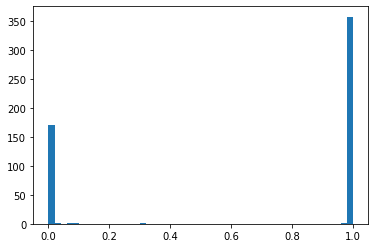

In [299]:
plt.hist(pred, bins = 50)

In [282]:
clf.predict(train)

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,

In [266]:
df = df_train[df_train['wheezy-copper-turtle-magic']==1]
X, y = df[cols].values, df['target'].values
X = VarianceThreshold(threshold=1.5).fit_transform(X)
n_features = VarianceThreshold(threshold=1.5).fit_transform(X).shape[1]
# X = FastICA(n_components=n_features, random_state=0, max_iter = 500).fit_transform(X)
# X = PolynomialFeatures(degree=2).fit_transform(X)
# X = StandardScaler().fit_transform(X)
# X = PCA(n_components=40).fit_transform(X)
# clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
# clf.fit(X, y)
# y_proba = clf.predict_proba(X)[:,1]
# tres = 0.90
# y[abs(y-y_proba)>tres] = 1-y[abs(y-y_proba)>tres]
# clf = KNeighborsClassifier(n_neighbors=8, p=2, weights="uniform")
# clf = LogisticRegression(solver='saga',penalty='l2',C=0.01,tol=0.001, max_iter= 500)

# # clf = NuSVC(probability=True, kernel='poly', degree=2, gamma='auto', nu=0.8, coef0=0.08)
# # clf = SVC(probability=True, kernel='poly', degree=1, gamma='auto', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# clf = QDA()
# # clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
# clf.fit(X_train,y_train)
# y_proba = clf.predict_proba(X_train)[:,1]
# roc_auc_score(y_train, y_proba)
# tres = 0.9
# y_train[abs(y_train-y_proba)>tres] = 1-y_train[abs(y_train-y_proba)>tres]

## Let's try an auto-encoder
from sknn import ae, mlp
from sknn.backend import AutoEncoderBackend, MultiLayerPerceptronBackend
from sknn.backend import lasagne
myae = ae.AutoEncoder(
            layers=[
                ae.Layer("Tanh", units=500),
                ae.Layer("Tanh", units=100),
                ae.Layer("Tanh", units=50),
                ae.Layer("Sigmoid", units=n_features)],
            learning_rate=0.002,  n_iter=10)
myae.fit(X)



# clf = QDA()
# clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)

# clf.fit(X_train, y_train)
# y_proba1 = clf.predict_proba(X_test)[:,1]

# ## Pseudo labelling

# vect = []
# y_test1 = []

# tres1 = 0.01
# for elt in y_proba1:
#     if elt > 1-tres1:
#         vect.append(True)
#         y_test1.append(1)
#     elif elt<tres1:
#         vect.append(True)
#         y_test1.append(0)
#     else:
#         vect.append(False)
        
# X1 = np.concatenate((X_train, X_test[vect,:]),axis = 0)
# y1 = np.concatenate((y_train, y_test1),axis = 0)
# clf = RandomForestClassifier(n_estimators = 500)
# clf = NuSVC(probability=True, kernel='poly', degree=2, gamma='auto', random_state=4, nu=0.8, coef0=0.08)
clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
clf.fit(X_t, y_t)
y_proba1 = clf.predict_proba(X_test)[:,1]
        
print(roc_auc_score(y_test, y_proba1))

# print(cross_val_score(clf, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8).mean())
# print(cross_val_score(clf1, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8).mean())

NotImplementedError: No backend sub-module imported.

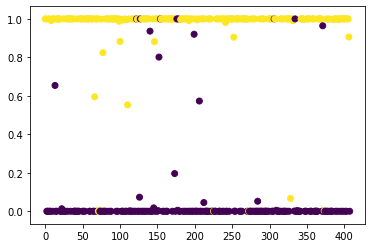

In [251]:
plt.scatter(list(range(y_proba.shape[0])),y_proba, c = y_train)

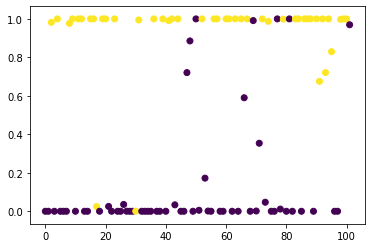

In [243]:
plt.scatter(list(range(y_proba1.shape[0])),y_proba1, c = y_test)

In [245]:
import sknn.ae as ae

In [246]:
dir(ae)

['AutoEncoder',
 'Layer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'backend',
 'itertools',
 'log',
 'logging',
 'nn',
 'print_function',
 'sklearn',
 'time',
 'unicode_literals']

In [888]:
df = df_train[df_train['wheezy-copper-turtle-magic']==0]
X, y = df[cols].values, df['target'].values
X = VarianceThreshold(threshold=1.5).fit_transform(X)

clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
clf.fit(X, y)
y_proba = clf.predict_proba(X)[:,1]
tres = 0.4
y[abs(y-y_proba)>tres] = 1-y[abs(y-y_proba)>tres]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=6,random_state=42, verbosity=2, scoring = 'roc_auc', n_jobs=8)
pipeline_optimizer.fit(X_train, y_train)
pipeline_optimizer.export('tpot_exported_pipeline.py')

Generation 1 - Current best internal CV score: 0.9593344394814983
Generation 2 - Current best internal CV score: 0.9595994103347044
Generation 3 - Current best internal CV score: 0.9595994103347044
Generation 4 - Current best internal CV score: 0.9595994103347044
Generation 5 - Current best internal CV score: 0.9671349921349922

Best pipeline: LogisticRegression(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), C=0.001, dual=True, penalty=l2)


In [889]:
pred = pipeline_optimizer.predict_proba(X_test)[:,1]
pred1 = pipeline_optimizer.predict(X_test)
print(roc_auc_score(y_test, pred))
confusion_matrix(y_test, pred1)

clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

0.972457627118644
0.9844632768361582


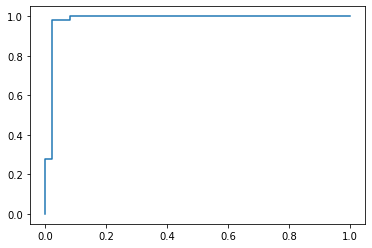

In [65]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr,tpr)


In [63]:
clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)
# clf = NuSVC(probability=True, kernel='poly', degree=2, gamma='auto', random_state=4, nu=0.7, coef0=0.08)

clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)[:,1]
pred1 = clf.predict(X_test)
print(roc_auc_score(y_test, pred))
confusion_matrix(y_test, pred1)

0.9841660802251936


array([[46,  3],
       [ 1, 57]], dtype=int64)

(array([  1.,   2.,   0.,   0.,   1., 102.,   0.,   0.,   0.,   1.]),
 array([-0.99999994, -0.80524898, -0.61049802, -0.41574706, -0.2209961 ,
        -0.02624515,  0.16850581,  0.36325677,  0.55800773,  0.75275869,
         0.94750965]),
 <a list of 10 Patch objects>)

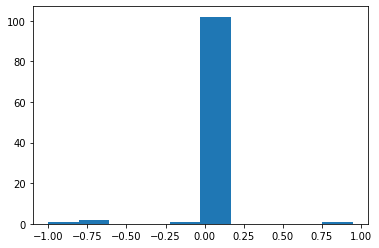

In [64]:
plt.hist(y_test-pred)

In [ ]:
df = df_train[df_train['wheezy-copper-turtle-magic']==0]
y = df['target'].values
X = df[cols].values

In [ ]:
clf1 = LogisticRegression(solver='saga',penalty='l2',C=0.01,tol=0.001)
clf2 = QuadraticDiscriminantAnalysis(reg_param = 0.01)
clf3 = SVC(probability=True, kernel='poly', degree=2, gamma='auto', random_state=42)
clf4 = NuSVC(probability=True, kernel='poly', degree=2, gamma='auto', random_state=4, nu=0.8, coef0=0.08)
clf5 = MLPClassifier(hidden_layer_sizes=(500, 100))
clf6 = KNeighborsClassifier(n_neighbors=15, p=2, weights="distance")

clfs = {'logreg' : clf1, 'QDA' : clf2, 'SVC' : clf3, 'NuSVC' : clf4, 'MLP' : clf5, 'KNN' : clf6}

pipe5 = Pipeline(steps = [('feat_red', VarianceThreshold(threshold=1.5)),
                ('classifier', clf5)])


In [ ]:
pipe6 = build_pipeline(clf6, X, y,1, 3,'KNN', scoring = 'roc_auc', cv = 5)

In [ ]:
cross_val_score(pipe3, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8).mean()

In [ ]:
pipes = [pipe1, pipe2, pipe3, pipe4, pipe5, pipe6]

In [ ]:
def objective(trial):
    
    w1 = trial.suggest_int('w1', 0, 5)
    w2 = trial.suggest_int('w2', 0, 5)
    w3 = trial.suggest_int('w3', 0, 5)
    w4 = trial.suggest_int('w4', 0, 5)
    w5 = trial.suggest_int('w5', 0, 5)
    w6 = trial.suggest_int('w6', 0, 5)
    
    
    eclf = EnsembleVoteClassifier(clfs=[pipe1, pipe2, pipe3, pipe4, pipe5, pipe6],
                              weights=[w1, w2, w3,w4,w5,w6], voting='soft')
    return 1 - cross_val_score(sclf, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8).mean()

study = optuna.create_study()
study.optimize(objective, n_trials=40)


In [ ]:

eclf = EnsembleVoteClassifier(clfs=[pipe1, pipe2, pipe3, pipe4, pipe5, pipe6],
                              weights=[1, 5, 3,4,1,1], voting='soft')
# sclf = StackingClassifier(classifiers=pipes, meta_classifier=lr, use_probas=True, average_probas=False)
cross_val_score(eclf, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8).mean()

In [ ]:
def build_pipeline(clf1, X, y,search_space, n_iter, cl, scoring = 'roc_auc', cv = 5):
    clf = deepcopy(clf1)
    n_features = VarianceThreshold(threshold=1.5).fit_transform(X).shape[1]
    best_pipeline = ""
    best_score  = 0
    for i in range(n_iter):
        print("Current iteration : "+str(i))
        print(clf)
        ### Build a pipeline for current classifier
        feat_red = [VarianceThreshold(threshold=1.5), PCA(n_components=n_features), 
                    FastICA(n_components=n_features, random_state=0, max_iter = 400)]

        feat_aug = [None, PolynomialFeatures(degree=2)]

        scaler = [None, StandardScaler(), Normalizer(norm="l2"),
                    Normalizer(norm="l1"), RobustScaler(),
                    MinMaxScaler()]
        
        count = 0
        for red in feat_red:
            for aug in feat_aug:
                for scal in scaler:
                    steps = [('feat_red' , red),
                        ('feat_aug' , aug),
                        ('scaler' , scal),
                        ('classifier' , clf)
                    ]
                    pipeline = Pipeline(steps = steps)
                    scores = cross_val_score(pipeline, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8)
                    count +=1
                    print(count)
                    if scores.mean()>best_score:
                        best_score = scores.mean()
                        best_pipeline = pipeline    
        print(best_pipeline)
        
        ### Build a classifier for current pipeline
        
        steps = best_pipeline.steps
        clf = steps[-1][1]
        
        def objective(trial):
                
                #### Logistic Regression
                
                
                if cl == 'logreg':
                    par = {
                                'solver' : trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
                                'C' : trial.suggest_loguniform('C', 0.001, 10),
                                'tol' : trial.suggest_uniform('tol', 0.0001, 0.002),
                            }
                #####  QDA
                if cl ==  'QDA':
                    par =  {'reg_param' : trial.suggest_uniform('reg_param', 0.0001, 0.999999)}

                #### SVC

                if cl == 'SVC':
                    par = {'degree': trial.suggest_int('degree', 1, 5),
                      'kernel' : trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly']),
                      'C' : trial.suggest_loguniform('C', 0.001, 10),
                      'coef0' : trial.suggest_uniform('tol', 0, 1)}

                #### NuSVC
                if cl == 'NuSVC':
                    par = {'degree': trial.suggest_int('degree', 1, 5),
                      'kernel' : trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly']),
                      'coef0' : trial.suggest_uniform('tol', 0, 1),
                      'nu' : trial.suggest_uniform('nu', 0.5, 0.9)}

                #### KNN
                if cl == 'KNN':
                    par = {'n_neighbors ' : trial.suggest_int('n_neighbors', 5, 40),
                  'weights ' :trial.suggest_categorical('weights', ['uniform', 'distance']),
                  'p' :trial.suggest_int('p', 1, 5) }

            
            
            
              
        
                clf.n_neighbors = trial.suggest_int('n_neighbors', 5, 40)
#                 clf.set_params(**par)
#                 clf.reg_param = par['reg_param']
                steps[-1] = ('classifier',clf)
                pipeline = Pipeline(steps = steps)
                scores = cross_val_score(pipeline, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8)
                return 1-scores.mean()
        study = optuna.create_study()
        study.optimize(objective, n_trials=40)
        print(study.best_params)
        
        clf1 = deepcopy(clf)
        
        clf1.n_neighbors =study.best_params['n_neighbors']
#         clf1.set_params(**study.best_params)
#         clf.reg_param = study.best_params['reg_param']
        
        p = deepcopy(best_pipeline)
        p.steps[-1] = ('classifier',clf1)
        scores1 = cross_val_score(p, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8)
        scores2 = cross_val_score(best_pipeline, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8)
        if scores1.mean()>scores2.mean():
            best_pipeline = p
            clf = clf1
        print(best_pipeline)
        print(max(scores1.mean(),scores2.mean()))
        best_score = max(scores1.mean(),scores2.mean())
    return best_pipeline

In [ ]:
#### Logistic Regression
par = {
                'solver' : trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
                'C' : trial.suggest_loguniform('C', 0.001, 10),
                'tol' : trial.suggest_uniform('tol', 0.0001, 0.002),
            }
#####  QDA
par =  {'reg_param' : trial.suggest_uniform('reg_param', 0.0001, 0.999999)}

#### SVC

par = {'degree': trial.suggest_int('degree', 1, 5),
      'kernel' : trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly']),
      'C' : trial.suggest_loguniform('C', 0.001, 10),
      'coef0' : trial.suggest_uniform('tol', 0, 1)}

#### NuSVC
par = {'degree': trial.suggest_int('degree', 1, 5),
      'kernel' : trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly']),
      'coef0' : trial.suggest_uniform('tol', 0, 1),
      'nu' : trial.suggest_uniform('nu', 0.5, 0.9)}

#### MLP Classifier

par = {'hidden_layer_sizes' : (trial.suggest_int('hidden_layer_sizes', 1, 1000),200)}
#### KNN

par = {'n_neighbors ' : trial.suggest_int('n_neighbors', 5, 40),
      'weights ' :trial.suggest_categorical('weights', ['uniform', 'distance']),
      'p' :trial.suggest_int('p', 1, 5) }


In [ ]:
clf2

In [ ]:
clf2.reg_param = 0.5

In [ ]:
feat_red = [VarianceThreshold(threshold=1.5), PCA(n_components=46), 
            FastICA(n_components=46, random_state=0, max_iter = 400)]

feat_aug = [None, PolynomialFeatures(degree=2)]

scaler = [None, StandardScaler(), Normalizer(norm="l2"),
            Normalizer(norm="l1"), RobustScaler(),
            MinMaxScaler()]
pipelines = {}
best_scores = {}
for classifier in clfs:
    print(pipelines)
    print(best_scores)
    best_score  = 0
    count = 0
    for red in feat_red:
        for aug in feat_aug:
            for scal in scaler:
                clf = clfs[classifier]
                steps = [('feat_red' , red),
                    ('feat_aug' , aug),
                    ('scaler' , scal),
                    ('classifier' , clf)
                ]
                pipeline = Pipeline(steps = steps)
                scores = cross_val_score(pipeline, X, y, cv = 5, scoring = 'roc_auc', n_jobs = 8)
                count +=1
                print(count)
                if scores.mean()>best_score:
                    best_score = scores.mean()
                    pipelines[classifier] = pipeline
                    best_scores[classifier] = best_score


In [ ]:
import mlxtend

In [ ]:
from mlxtend.classifier import StackingClassifier

clf1 = KNeighborsClassifier(n_neighbors=15, p=2, weights="distance")
clf2 = LogisticRegression(solver='saga',penalty='l2',C=0.01,tol=0.001)
clf3 = QuadraticDiscriminantAnalysis(reg_param = 0.11)
clf4 = NuSVC(probability=True, kernel='poly', degree=2, gamma='auto', random_state=4, nu=0.8, coef0=0.08)
lr = LogisticRegression(solver = 'lbfgs')

sclf = StackingClassifier(classifiers=[clf1, clf2, clf4], 
                          meta_classifier=lr, use_probas=True, average_probas=False)
sclf.fit(X_train, y_train)

pred1 = sclf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, pred1))

In [ ]:
# clf = NuSVC(probability=True, kernel='poly', degree=4, gamma='auto', random_state=4, nu=0.8, coef0=0.08)
clf = KNeighborsClassifier(n_neighbors=13, p=2, weights="distance")
# clf = KNeighborsClassifier(n_neighbors=22, weights="uniform")
# clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
# clf = LogisticRegression(solver='saga',penalty='l2',C=0.01,tol=0.001)
# clf = QuadraticDiscriminantAnalysis(reg_param = 0.11)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)#[:,1]
pred1 = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, pred1))
# train = np.concatenate((X_train, X_test), axis = 0)
# y = np.concatenate((y_train, pred), axis = 0)
# clf.fit(train, y)
# pred = clf.predict_proba(X_test)[:,1]
# print(roc_auc_score(y_test, pred))


In [ ]:
pred1

In [ ]:
clfs = [QuadraticDiscriminantAnalysis(reg_param = 0.11),
        NuSVC(probability=True, kernel='poly', degree=4, gamma='auto', random_state=4, nu=0.8, coef0=0.08),
        LogisticRegression(solver='saga',penalty='l2',C=0.01,tol=0.001),
        KNeighborsClassifier(n_neighbors=11, p=2, weights="distance"),
        KNeighborsClassifier(n_neighbors=22, weights="uniform")
        ]

p1 = np.zeros((X_train.shape[0], len(clfs)))
p2 = np.zeros((X_test.shape[0], len(clfs)))

for i in range(len(clfs)):
    clf = clfs[i]
    clf.fit(X_train, y_train)
    p1[:, i] = clf.predict_proba(X_train)[:,1]
    p2[:, i] = clf.predict_proba(X_test)[:,1]

def objective(trial):
    params = []
    for elt in range(len(clfs)):
        params.append(trial.suggest_uniform('p'+str(elt),0, 1-sum(params)))
    
    
    pred = np.zeros(X_train.shape[0])
    
    for j in range(len(clfs)):
        pred += params[j] * p1[:,j]
    
    return 1-roc_auc_score(y_train, pred)

study = optuna.create_study()
study.optimize(objective, n_trials=30, n_jobs = 8)

In [ ]:
study.best_params

In [ ]:
pred1 = np.zeros(X_test.shape[0])
count = 0
for elt in study.best_params:
    pred1 += study.best_params[elt]*p2[:,count]
    count+=1

roc_auc_score(y_test, pred1)

In [ ]:
pred = []
true = []



for i in range(512):
    print('***********************                   '+str(i)+'                ************************')
    df1 = df_train[df_train['wheezy-copper-turtle-magic']==i]
    y = df1['target'].values
    X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state = 42)
    
    n_features = VarianceThreshold(threshold=1.5).fit_transform(X_train[cols]).shape[1]
    mappers = [
    VarianceThreshold(threshold=1.5),

#             PCA(n_components=n_features) ,
#             StandardScaler(),
#             Normalizer(norm="l2"),
#             Normalizer(norm="l1"),
#             PolynomialFeatures(degree=2),
#             RobustScaler(),
#             MinMaxScaler(),             
    
          ]
    
    
    X_train, X_test = transform(X_train, X_test, mappers)
    
    
    
    
    parameters = {'n_neighbors':list(range(7,30))
                 }
    
#     knn = KNeighborsClassifier( p = 2,weights="distance")
#     clf = GridSearchCV(knn, parameters, cv=5, scoring = 'roc_auc', n_jobs = 8, iid = True)
    
    clf = QuadraticDiscriminantAnalysis(reg_param = 0.111)
#     clf = KNeighborsClassifier(n_neighbors=13, p=2 , weights="distance")
#     clf = LogisticRegression(C=0.01,solver = 'lbfgs', dual=False, penalty="l2")
    
    clf.fit(X_train, y_train)
    pred1 = clf.predict_proba(X_test)[:,1]
    for i in range(3):
        X1 = X_test[pred1>0.999999]
        X0 = X_test[pred1<0.000001]
        y1 = np.zeros(X1.shape[0])+1
        y0 = np.zeros(X0.shape[0])
        X_train = np.concatenate((X_train, X1, X0))
        y_train = np.concatenate((y_train, y1, y0))
        clf.fit(X_train, y_train)
        pred1 = clf.predict_proba(X_test)[:,1]
        print(roc_auc_score(y_test, pred1))
    
    
    pred1 = clf.predict_proba(X_test)[:,1]
#     pred1 = scale_result(X_test, clf)
    
    pred += list(pred1)
    true += list(y_test)
    
roc_auc_score(true, pred)    

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax